# Mediatrix Filamentation  example

We start by importing the relevant libs

In [1]:
import mediatrix 

import imagetools as imgt 

import numpy as np

from math import atan,sqrt

C:\Users\debom\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Do not worry by this warning, this is due the aplpy that probably will correct this in the near future.

Now we open the file we want to process, at this moment the code supports fits files (aplpy) and any opencv grayscale readable format. After reading the file we segment, that is, we identify the relevant sources in the figure.

In [2]:
segimg,objimg,original_img,hdr,file_name,_ids,area=imgt.segmentation('imgs/arcfull17064_0_3.39_r.fits',method='std',\ 
                                                                     smooth=0.0,threspar=2)

         Degrees ('deg') is being used as default unit value.


Unit: deg/px


In the last line, we segment the image by choosing as part of the source any pixel which intensity is higher than the mode of the image histogram plus 2(threspar=2) times its standard deviation (method='std'). The warning are telling us that the example image does not have wcs information, so it is using the pixels as coordinates. Now we are going to select only the object labeled as object 1.

In [3]:
_otmp,_htmp = imgt.segstamp(segimg,1,objimg,hdr,increase=2,connected=True)

Unit: deg/px


         Degrees ('deg') is being used as default unit value.


Now we are ready to apply the mediatrix filamentation. We select the process to stop in the iteration level number 3 and disregard the extrema. After we present the results of the filamentation.

In [4]:
med_fil=mediatrix.filamentation(_otmp, method="brightestinline", alpha=0,near_distance=(sqrt(2)/2), \
                                max_level=3, use_extremes=False)
med_fil

{'L': 206.00820373280692,
 'L/W': 13.71115224673976,
 'center': (65.71199999999999+89.416j),
 'circle_params': [(-784.0020246913601-498.847555555557j), (120+2j), (3+171j)],
 'end': [(78.63117415973468+22.416437841033503j),
  (65.51182559617942+44.56713296508994j),
  (52.78937229460679+63.65648542787963j),
  (37.56419882133732+83.37275206676131j),
  (21.084499253110625+105.69034463720737j),
  (7.160014835103841+124.10787102151687j)],
 'origin': [(100.80029491194826+35.495760030543906j),
  (87.70559719636603+57.67720620674399j),
  (73.4312802877695+79.09504600341864j),
  (57.66514059097198+99.46647088481733j),
  (42.380885943206394+120.16513511468254j),
  (26.86461255531039+140.6656273198337j)]}

For further info on this outputs see https://arxiv.org/abs/1212.1799. We can now derive more measurements: 

In [5]:
mediatrix_S1=mediatrix.eval_med_stats(med_fil,_otmp)
mediatrix_S1

{'L/R': 0.3813215523561885,
 'MinM_norm': 0.01673752201827914,
 'center_MinM': (-376.08344615299654-221.5256002871948j),
 'center_comparison': 2.3943687274046783,
 'curvature_comparison': 0.24199129213421355,
 'intersection': 0,
 'sigma_exc': 39.96290654934075,
 'sigma_lenght': 0.14276558800469646}

These last measurements are fully described in https://arxiv.org/abs/1607.04644 used as inputs to the arcfinder code.
We may now plot the results:

INFO:astropy:Auto-setting vmin to -8.477e-01
INFO:astropy:Auto-setting vmax to  9.409e+00


INFO: Auto-setting vmin to -8.477e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.409e+00 [aplpy.core]


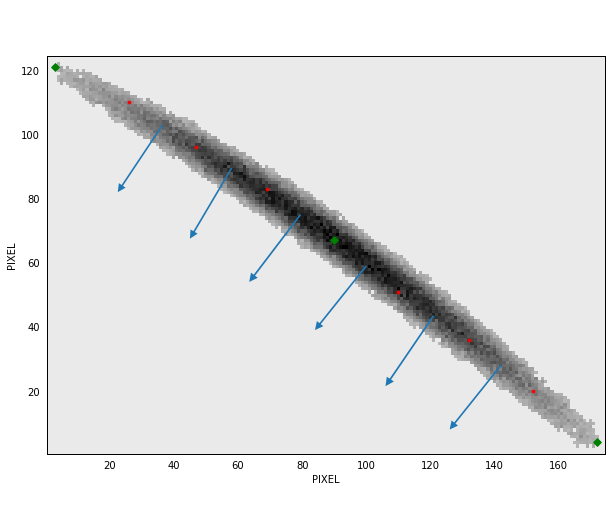

In [6]:
plot_args={'max_level': 3} 
plot_args['alpha']= 0  
plot1,center,centerM,size=mediatrix.plot_med_stats_apl(_otmp,1,keydots=True,circle=True, \
                                                       rc=False, save=False, use_extremes=False,args=plot_args)